In [7]:
import pandas as pd
import nltk
# nltk.download()
import matplotlib.pyplot as plt

In [37]:
# sent1 = ['Call', 'me', 'Ishmael', '.']

# df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df21=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
df21.count()
df21.describe()
df21[df21['id']==318]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


In [36]:
df2=pd.read_csv('../input/the-movies/movies_metadata.csv')
df2.columns
# df2.describe()
df2[df2['id']==318]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(stop_words='english')
tv = TfidfVectorizer(stop_words='english')

a = "cat hat bat splat cat bat hat mat cat"
b = "cat mat cat sat"

In [5]:
cv_score = cv.fit_transform([a, b])
cv_score

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

## TF-IDF
* TF - Term Frequency: = term instances / total instances
* IDF - Inverse Document Frequency = log(number of doc / number of documents have term)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

def cal_tfidf_matrix(df2):
    #Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
    tfidf = TfidfVectorizer(stop_words='english')

    #Replace NaN with an empty string
    df2['overview'] = df2['overview'].fillna('')

    #Construct the required TF-IDF matrix by fitting and transforming the data
    tfidf_matrix = tfidf.fit_transform(df2['overview'])

    tfidf_matrix.shape
    return tfidf_matrix

cal_tfidf_matrix(df21)

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [1]:
import pandas as pd 
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# from surprise import Reader, Dataset, SVD, evaluate

# df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')



In [4]:
# df2.overview.mode()
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

# df2.apply(lambda row: nltk.word_tokenize(row['overview']), axis=1)
# nltk.word_tokenize("a b c")

from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# stop_words



In [24]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
def check_words(df2):

    df2['overview'] = df2['overview'].fillna('')
    df2['dummy'] = 1

    text = df2.groupby('dummy')['overview'].apply(' '.join)

    # overview = nltk.Text(text)
    text = text.iloc[0]
    text = nltk.word_tokenize(text)

    # overview
    print("Number of word: ", len(text))
    stop_words = stopwords.words('english')
    # text = list(filter(lambda x: x not in stopwords.words('english'), text))
    # remove stop words
    text = [w for w in text if not w in stop_words]
    print("After remove stop words: ", len(text))
    text = [w for w in text if not w.lower() in stop_words]
    print("After remove stop words (uncase): ",len(text))

    # remove short words
    short_words = [w for w in text if len(w) <3 ]
    print("Shorts words: ", len(short_words), short_words[:10])

    text = [w for w in text if len(w) >2 ]
    print("After remove Shorts words: ",len(text), text[:10])
    return text
text = check_words(df21)
# check_words(df2)

Number of word:  282268
After remove stop words:  182637
After remove stop words (uncase):  175454
Shorts words:  32971 [',', ',', '.', ',', ',', '.', '.', '’', '.', ',']
After remove Shorts words:  142483 ['22nd', 'century', 'paraplegic', 'Marine', 'dispatched', 'moon', 'Pandora', 'unique', 'mission', 'becomes']


In [10]:
overview = nltk.Text(text)
# overview.dispersion_plot(text)
# sorted(set(overview))
fdist1 = nltk.FreqDist(overview)
fdist1.most_common(10)

[('life', 798),
 ('one', 613),
 ('young', 602),
 ('family', 532),
 ('world', 519),
 ('man', 514),
 ('find', 473),
 ('story', 442),
 ('must', 435),
 ('new', 428)]

In [28]:
overview.collocations(100)
# Remove none common words
print(len(text))
most_commons = list(map(lambda x: x[0], fdist1.most_common(30)))

text2 = [w for w in text if w in most_commons]
print(len(text2))
# text
# b = nltk.Text(a)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# b.plot()

New York; Los Angeles; high school; World War; York City; United
States; best friend; true story; small town; Las Vegas; falls love;
San Francisco; Along way; tells story; young man; years later; serial
killer; martial arts; FBI agent; young woman; Hong Kong; road trip;
years ago; Christmas Eve; turned upside; James Bond; year old; fall
love; join forces; Civil War; come terms; drug lord; young boy; true
love; Secret Service; find way; police officer; alter ego; High
School; best friends; Beverly Hills; get back; drug dealer; next door;
20th century; New Jersey; one day; New Orleans; one another; White
House; One day; love triangle; 19th century; younger brother; real
estate; Based true; law enforcement; one last; car crash; Wall Street;
District Attorney; exact revenge; first time; n't know; single mother;
becomes involved; step ahead; car accident; Air Force; cross paths;
Scary Movie; work together; wreak havoc; decides take; one thing; Snow
White; must find; returns home; one night;

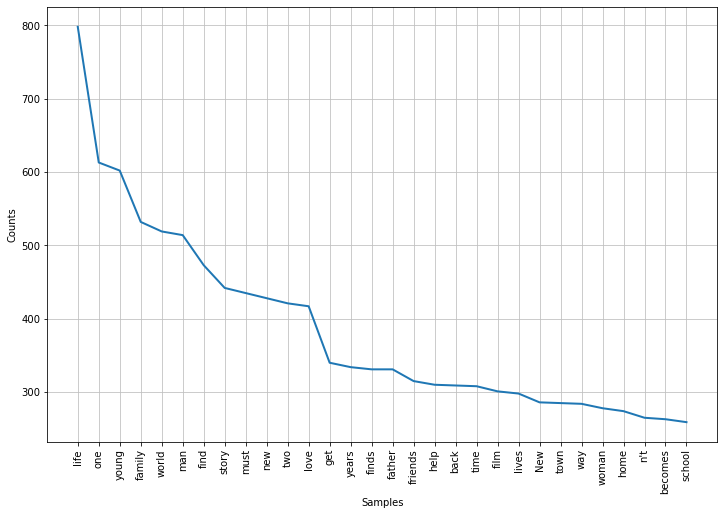

In [26]:
fdist1.N()
len(set(overview))
len(overview)
fdist2 = nltk.FreqDist(text2)
fdist2.plot()